In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split 


In [45]:
songs = pd.read_csv('C:/Users/camer/OneDrive/Documents/WPI School/2021-2022/Term D/MA 4635/SpotifyFeatureEngineeredCSV.csv')
songs2 = pd.read_csv('C:/Users/camer/OneDrive/Documents/WPI School/2021-2022/Term D/MA 4635/SpotifyFeatureEngineeredCSV.csv')

In [46]:
mappings = {
    'Minor': 0,
    'Major': 1,
}
songs['mode'] = songs['mode'].apply(lambda x: mappings[x])


In [47]:
songs.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1], axis = 0)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,k=(4*pi()/6)y,Key X,Key Y,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0.1,15.0,0.00385,0.289,139787.0,0.164,0.000000,0.00,-0.87,-0.87,0.08,-17.89,0.0,0.03,79.94,3.0,0.10
0.2,26.0,0.02150,0.398,172612.2,0.321,0.000000,0.52,-0.87,-0.87,0.09,-13.19,0.0,0.03,89.03,4.0,0.19
0.3,32.0,0.05990,0.468,191493.0,0.439,0.000000,1.05,-0.50,-0.50,0.10,-10.66,0.0,0.04,96.27,4.0,0.28
0.4,38.0,0.12800,0.523,206440.0,0.527,0.000004,2.09,-0.50,-0.50,0.11,-8.99,1.0,0.04,105.22,4.0,0.36
0.5,43.0,0.23200,0.571,220427.0,0.605,0.000044,2.62,0.00,0.00,0.13,-7.76,1.0,0.05,115.78,4.0,0.44
0.6,48.0,0.39100,0.618,235627.0,0.678,0.000529,3.67,0.50,0.00,0.16,-6.78,1.0,0.06,124.59,4.0,0.53
0.7,52.0,0.61300,0.666,254213.0,0.748,0.007830,4.19,0.50,0.50,0.22,-5.91,1.0,0.08,133.31,4.0,0.61
0.8,57.0,0.80700,0.718,280320.0,0.824,0.169000,4.71,0.87,0.87,0.31,-5.08,1.0,0.14,144.00,4.0,0.71
0.9,63.0,0.93400,0.785,330760.0,0.901,0.819000,5.24,1.00,0.87,0.47,-4.11,1.0,0.28,162.27,4.0,0.82
1.0,100.0,0.99600,0.989,5552917.0,0.999,0.999000,5.76,1.00,1.00,1.00,3.74,1.0,0.97,242.90,5.0,1.00


In [48]:
songs['popularity'] = np.where(songs['popularity'].between(0,15), 0, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(16,26), 1, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(27,32), 2, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(33,38), 3, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(39,43), 4, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(44,48), 5, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(49,52), 6, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(53,57), 7, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(58,63), 8, songs['popularity'])
songs['popularity'] = np.where(songs['popularity'].between(64,100), 9, songs['popularity'])

In [49]:
updated_songs = songs.drop(['genre','artist_name', 'track_name', 'track_id', 'key'], axis=1)
updated_songs = updated_songs.astype('float64')
display(updated_songs)
print(updated_songs.dtypes)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,k=(4*pi()/6)y,Key X,Key Y,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,9.0,0.494000,0.734,165214.0,0.4720,0.002930,0.52,0.87,0.50,0.10,-8.19,0.0,0.31,190.01,4.0,0.39
1,1.0,0.004390,0.455,158333.0,0.9140,0.014900,2.09,-0.50,0.87,0.08,-4.13,1.0,0.10,118.99,5.0,0.84
2,9.0,0.494000,0.734,165214.0,0.4720,0.002930,0.52,0.87,0.50,0.10,-8.19,0.0,0.31,190.01,4.0,0.39
3,5.0,0.051600,0.764,223466.0,0.8520,0.000008,1.05,0.50,0.87,0.37,-5.55,1.0,0.16,112.04,4.0,0.53
4,2.0,0.000615,0.331,166467.0,0.9920,0.000000,2.09,-0.50,0.87,0.21,-2.73,0.0,0.07,181.57,4.0,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,3.0,0.086200,0.603,216500.0,0.9770,0.000000,5.24,0.50,-0.87,0.23,-1.80,0.0,0.35,180.11,4.0,0.61
232721,0.0,0.002320,0.562,216600.0,0.9120,0.000000,5.24,0.50,-0.87,0.22,-2.50,1.0,0.26,180.02,4.0,0.60
232722,5.0,0.200000,0.536,190560.0,0.4930,0.313000,3.67,-0.87,-0.50,0.16,-7.88,1.0,0.03,97.08,4.0,0.17
232723,5.0,0.200000,0.536,190560.0,0.4930,0.313000,3.67,-0.87,-0.50,0.16,-7.88,1.0,0.03,97.08,4.0,0.17


popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
k=(4*pi()/6)y       float64
Key X               float64
Key Y               float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
dtype: object


In [68]:
train, test = train_test_split(updated_songs,test_size=0.2, random_state=32)

train_features,train_labels = train[['danceability','duration_ms','energy','loudness']],train['popularity']
test_features,test_labels = test[['danceability','duration_ms','energy','loudness']],test['popularity']

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1000, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
#normal 50 epoch
history = model.fit(train_features,train_labels,validation_split=0.2,epochs=50)

Epoch 1/50
4655/4655 [==============================] - 52s 11ms/step - loss: 275.1113 - accuracy: 0.1089 - val_loss: 2.3010 - val_accuracy: 0.1099
Epoch 2/50
4655/4655 [==============================] - 52s 11ms/step - loss: 2.3013 - accuracy: 0.1095 - val_loss: 2.3012 - val_accuracy: 0.1099
Epoch 3/50
4655/4655 [==============================] - 55s 12ms/step - loss: 2.3013 - accuracy: 0.1092 - val_loss: 2.3011 - val_accuracy: 0.1099
Epoch 4/50
4655/4655 [==============================] - 52s 11ms/step - loss: 2.3013 - accuracy: 0.1090 - val_loss: 2.3010 - val_accuracy: 0.1099
Epoch 5/50
4655/4655 [==============================] - 54s 12ms/step - loss: 2.3013 - accuracy: 0.1096 - val_loss: 2.3011 - val_accuracy: 0.1099
Epoch 6/50
4655/4655 [==============================] - 54s 12ms/step - loss: 2.3013 - accuracy: 0.1095 - val_loss: 2.3010 - val_accuracy: 0.1099
Epoch 7/50
4655/4655 [==============================] - 56s 12ms/step - loss: 2.3013 - accuracy: 0.1094 - val_loss: 2.3010

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_features,test_labels,verbose=2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
#change the earlier line that says model.fit(blah blah blah) to fitted = model.fit(blah blah blah)

epoch_list = list(range(1,len(history.history['accuracy'])+1))
plt.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
plt.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="lower right")

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(1000, activation='tanh', input_shape=(4,)))
model2.add(tf.keras.layers.Dense(1000,activation='tanh'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_features,train_labels,validation_split=0.2,epochs=50)

In [ ]:
test_loss, test_acc = model2.evaluate(test_features,test_labels,verbose=2)

In [ ]:
epoch_list = list(range(1,len(history2.history['accuracy'])+1))
plt.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy')
plt.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="lower right")

In [150]:
predictions = model.predict(test_features)

1455/1455 [==============================] - 1s 718us/step


In [117]:
pred_df = pd.DataFrame(predictions)
display(pred_df)

,0,1,2,3,4,5,6,7,8,9
0,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
1,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
2,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
3,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
4,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
...,...,...,...,...,...,...,...,...,...,...
46540,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
46541,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
46542,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681
46543,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681


In [118]:
pred_df.columns = ['0','1','2','3','4','5','6','7','8','9']
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))
    
pred_df['Predict'] = predict

In [119]:
pred_df['Real'] = list(test_labels.copy())
display(pred_df)

,0,1,2,3,4,5,6,7,8,9,Predict,Real
0,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0
1,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,6.0
2,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,4.0
3,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,1.0
4,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46540,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0
46541,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,7.0
46542,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,7.0
46543,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,8.0


In [128]:
display(pred_df.sort_values(by='Real', ascending=True))

,0,1,2,3,4,5,6,7,8,9,Predict,Real
12126,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,0.0
20704,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,0.0
36242,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,0.0
39401,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,0.0
38836,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22089,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0
22102,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0
22113,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0
22124,0.103315,0.109742,0.097511,0.105222,0.094533,0.103663,0.09148,0.101032,0.096692,0.09681,1,9.0


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(test_labels.copy()),predict)

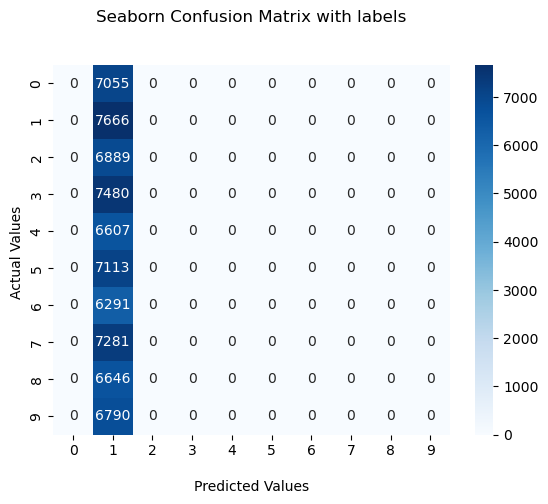

In [43]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

## Display the visualization of the Confusion Matrix.
plt.show()

NameError: name 'training' is not defined